In [4]:
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape, Conv2D, Conv2DTranspose
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import IPython.display

### Define the model -

In [2]:
# define input data
X = np.asarray([[1, 2],
			 [3, 4]])
# show input data for context
print(X)
# reshape input data into one sample a sample with a channel
X = X.reshape((1, 2, 2, 1))

# define model
model = Sequential()
# define input shape, output enough activations for for 128 5x5 image
model.add(Dense(128 * 5 * 5, input_dim=100))
# reshape vector of activations into 128 feature maps with 5x5
model.add(Reshape((5, 5, 128)))
# double input from 128 5x5 to 1 10x10 feature map
model.add(Conv2DTranspose(1, (3,3), strides=(2,2), padding='same'))
# summarize model
model.summary()

[[1 2]
 [3 4]]
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 3200)              323200    
_________________________________________________________________
reshape (Reshape)            (None, 5, 5, 128)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 10, 10, 1)         1153      
Total params: 324,353
Trainable params: 324,353
Non-trainable params: 0
_________________________________________________________________


### Generate a random image using CNN output -
This isn't part of the guide, but I was just curious to see how the generated image would look, so I used a random input value and scaled the image to 100x100 to visualize it.

(3, 100)


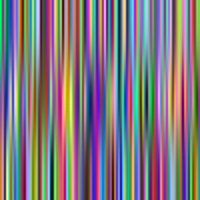

In [13]:
output = model.predict(np.random.rand(3,100)).reshape(3,100)
print(output.shape)
generated_image = Image.fromarray(output, mode='RGB')
scaled_image = generated_image.resize((200, 200))
IPython.display.display(scaled_image)